# Seasonal Decompoosition

## 1.Trend
## 2.Seasonality
## 3.Noise


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [5]:
series = [i+randrange(10) for i in range(1,100)]


## Additive

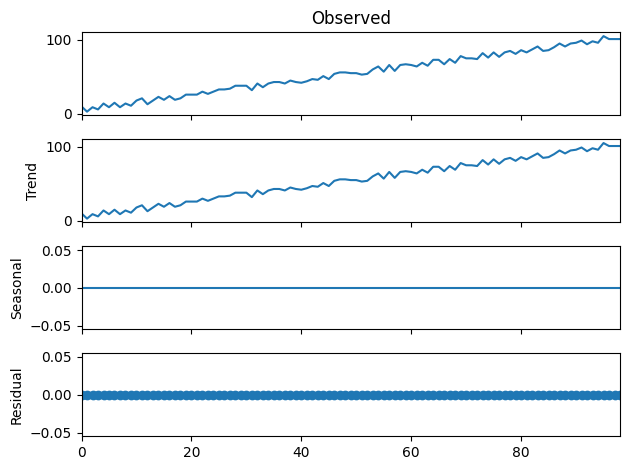

In [6]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

## Multiplicative

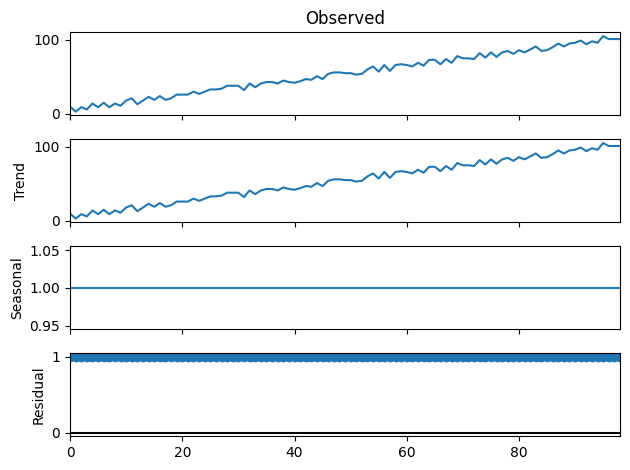

In [7]:
series_2 = [i**2.0 for i in range(1,100)]
result_2 = seasonal_decompose(series, model='multiplicative', period=1)
result_2.plot()
pyplot.show()

# Example

In [8]:
df=pd.read_csv(r'airline-passengers_data.csv')
 
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month'>

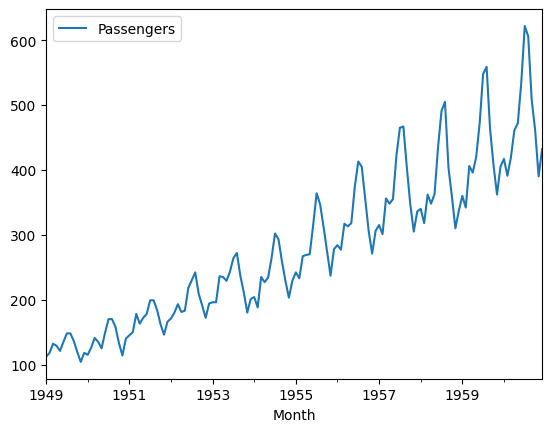

In [9]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()


## Additive

In [10]:
result_air=seasonal_decompose(df['Passengers'], model='additive', period=12)

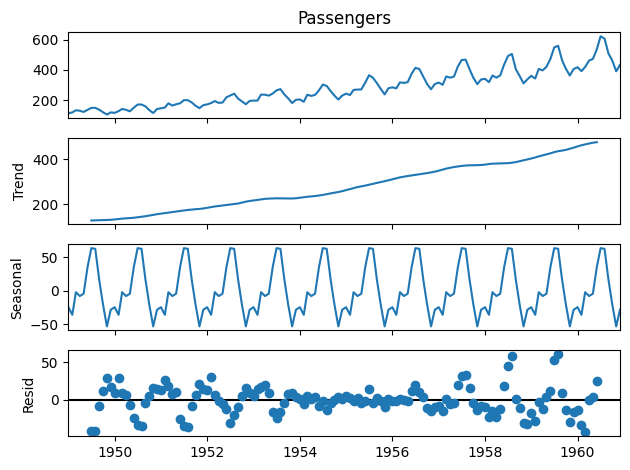

In [11]:
result_air.plot()
pyplot.show()

**Here the noise have a pattern which should not be there as noise should be mean around 0 and 1 which would pretty much give us a straight line , Hence this is not a additive series**

## Multiplicative

In [13]:
result_mult =seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

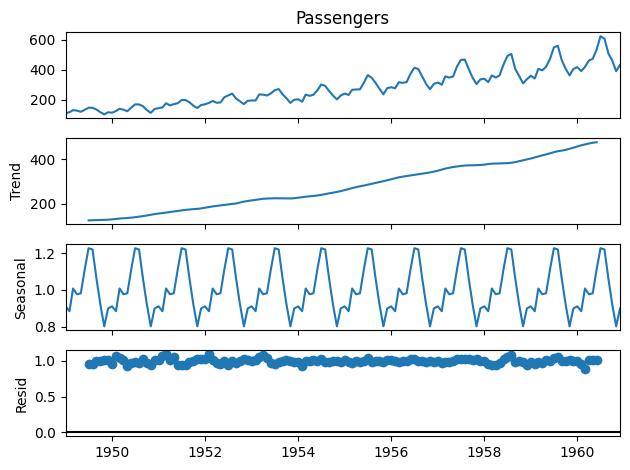

In [14]:
result_mult.plot()
pyplot.show()

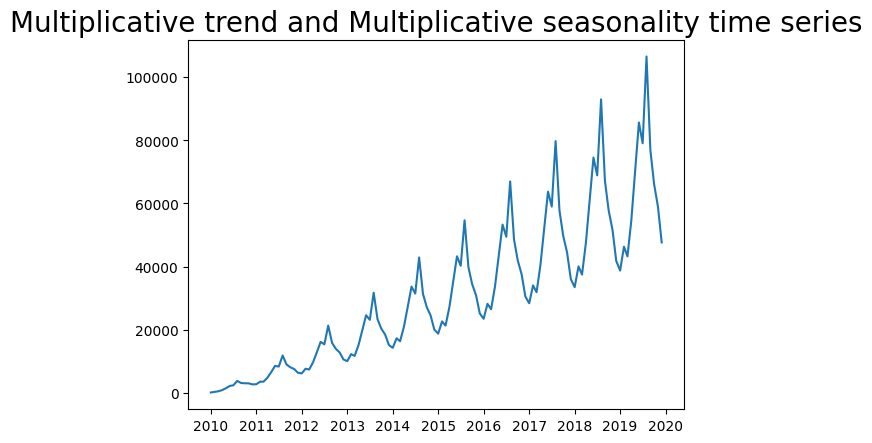

In [16]:
# Single season multiplier factors - for seasonality effect
xs = np.arange(1, 121)
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);